In [1]:
## Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading csv file into df(Data Frame) and displaying the dataframe
df = pd.read_csv("TMA_Data.csv")
df

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.40,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.60,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.40,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.10,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.00,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,10/11/1981,F,Married,Non-Resident,No,2/16/2015,NaN,IT,89883,Meet,3.69,5,15
246,247,Zane Downes,10/24/87,M,Married,Non-Resident,No,4/20/2017,NaN,IT,90100,Meet,3.40,3,14
247,248,Zayd Farley,7/9/1970,M,Single,Non-Resident,No,1/5/2014,NaN,IT,138888,Exceed,4.30,5,4
248,249,Zoya Easton,8/2/1980,F,Single,Non-Resident,No,8/13/2012,9/1/2015,Manufacturing,50274,To Improve,2.50,3,13


In [2]:
# Question 1(b) First Chart: Male vs Female Count + Average salary + satisfaction
# Converting the dataframe into numppy array
data = df.to_numpy()

#Initializing variables to zero first in order to store stats
male_count = 0; male_salary = 0; male_satisfaction = 0; 
female_count = 0; female_salary = 0; female_satisfaction = 0;

# Iterating over all of the rows(.shape[0]) of dataset using '0' for rows
for x in range(data.shape[0]): 
    
    if data[x,3] == 'M ': # if current record is male staff. *Space after the letter 'M ' in order to match the data in csv file 
        male_count += 1 # Increment variable male_count by 1
        male_salary += data[x,10] # add salary of current male staff to variable male_salary
        male_satisfaction += data[x,13] # add satisfaction score of current male staff to variable male_satisfaction
    
    elif data[x,3] == 'F': # Else if the current record belong to female staff instead
        female_count += 1 # Increment variable female_count by 1
        female_salary += data[x,10] # add salary of current female staff to variable male_salary
        female_satisfaction += data[x,13] # add satisfaction score of current female staff to variable male_satisfaction

# Storing the table_1 data and calculating the Average Salary and Average Satisfaction into list of list        
table_1 = [['M', male_count, male_salary/male_count, male_satisfaction/male_count ],
           ['F', female_count, female_salary/female_count, female_satisfaction/female_count ]]

In [3]:
# Converting table_1 into dataframe and displaying the corresponding summarised table
pd.DataFrame(table_1, columns=['Gender', 'Count', 'Average Salary', 'Average Satisfaction'])

,Gender,Count,Average Salary,Average Satisfaction
0,M,106,71063.811321,3.877358
1,F,144,67686.527778,3.993056


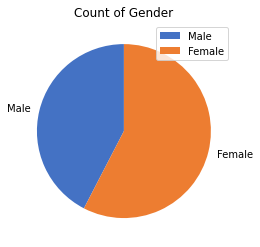

F     144
M     106
Name: Gender, dtype: int64


In [4]:
# Plotting and displaying the pie chart which includes the start angle, colours, labels and values

mylabel_table1 = ['Male', 'Female']
mycolours_table1 = ['#4472C4', '#ED7D31']
values = df['Gender'].value_counts()

plt.pie([male_count, female_count], labels = mylabel_table1, startangle = 90,
       colors = mycolours_table1)

plt.title('Count of Gender')
plt.legend()
plt.show()
print(values)

In [5]:
# Question 1(b) Second Chart: Minority Male + Female Count + Average salary + satisfaction
# Converting the dataframe into numppy array
data = df.to_numpy()

#Initializing variables to zero first in order to store stats
minority_yes_count = 0; minority_yes_salary = 0; minority_yes_satisfaction = 0; minority_yes_female = 0; minority_yes_male = 0;
minority_no_count = 0; minority_no_salary = 0; minority_no_satisfaction = 0; minority_no_female = 0; minority_no_male = 0;

# Iterating over all of the rows(.shape[0]) of dataset using '0' for rows
for x in range(data.shape[0]):
    
    if data[x,6].lower() == 'yes': # If current record is a minority staff. There is one 'yes' which is in lower case, workaround is using .lower().
        
        if data[x,3] == 'F': # if current record is a minority & female staff
            minority_yes_female += 1 # Increment female minority count by 1
            
        elif data[x,3] == 'M ': # else if current record is a minority & male staff. *Space after the letter 'M ' in order to match the data in csv file 
            minority_yes_male += 1 # Increment male minority count by 1
            
        minority_yes_count += 1 # Increment minority yes count by 1
        minority_yes_salary += data[x,10] # Add salary of current minority staff to variable minority_yes_salary
        minority_yes_satisfaction += data[x,13] # Add satisfaction score of current minority staff to variable minority_yes_satisfaction
        
    elif data[x,6].lower() == 'no': # else if current record is not a minority staff. *There is one 'no' which is in lower case, workaround is using .lower().
        
        if data[x,3] == 'F': # if current record is a not minority & female staff
            minority_no_female += 1 # Increment female non-minority count by 1
            
        elif data[x,3] == 'M ': # else if current record is not a minority & male staff. *Space after the letter 'M ' in order to match the data in csv file 
            minority_no_male += 1 # Increment male non-minority count by 1
            
        minority_no_count += 1 # Increment non-minority count by 1
        minority_no_salary += data[x,10] # Add salary of current non-minority staff to variable minority_no_salary
        minority_no_satisfaction += data[x,13] # Add satisfaction score of current non-minority staff to variable minority_no_satisfaction
        
# Storing the table_2 data and calculating the minority and non-minority count by gender, calculation of it's average salary and average satisfaction score into list of list        
table_2 = np.array( [np.array(['Yes', minority_yes_count, minority_yes_female, minority_yes_male, minority_yes_salary/minority_yes_count, minority_yes_satisfaction/minority_yes_count ]),
            np.array(['No', minority_no_count, minority_no_female, minority_no_male, minority_no_salary/minority_no_count, minority_no_satisfaction/minority_no_count ])])    

In [6]:
# Converting table_2 into dataframe and displaying the corresponding summarised table
pd.DataFrame(table_2, columns=['Minority', 'Count', 'Female', 'Male', 'Average Salary', 'Average Satisfaction'])

,Minority,Count,Female,Male,Average Salary,Average Satisfaction
0,Yes,25,12,13,73478.08,4.0
1,No,225,132,93,68634.09777777777,3.937777777777778


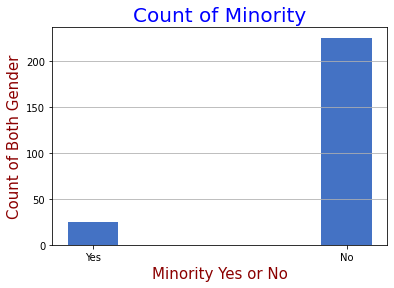

In [7]:
# Ploting and Displaying bar chart which includes labels, titles, font size, colour

plt.bar(['Yes', 'No'], [minority_yes_count, minority_no_count], width = 0.2, color = '#4472C4', linestyle = '--')

font1 = {'color':'blue', 'size':20}
font2 = {'color':'darkred', 'size':15}

plt.title('Count of Minority', fontdict = font1)
plt.xlabel("Minority Yes or No", fontdict = font2)
plt.ylabel("Count of Both Gender", fontdict = font2)

plt.grid(axis = 'y')
plt.show()

In [8]:
# Question 1(c)

# Importing the necessary packages
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

# Reading csv file into df(Data Frame)
df = pd.read_csv("TMA_Data.csv")

# defining a method to take two string dates to subtracts them and return the difference 
def subtract_dates(d1,d2):
    d1 = d1.split('/') # splitting the first date of day, month, year
    d2 = d2.split('/') # splitting the Second date of day, month, year
    dt1 = date(int(d1[2]), int(d1[0]), int(d1[1])) # creating new date object for first date 
    dt2 = date(int(d2[2]), int(d2[0]), int(d2[1])) # creating new date object for second date
    alpha = dt1 - dt2 # Formula to subtract both of the date object
    return alpha.days/365 # Converting days to years and thereafter returning them to a calling function

# Filling up the missing Left Date records with 1/5/2022
df['LeftDate'] = df['LeftDate'].replace(np.nan, '1/5/2022')
new_data = df.to_numpy()

# Creating a list to store the length of service for all of the staff in records
ServiceDuration = []

for i in range(new_data.shape[0]): # Iterating over all of the rows(.shape[0]) of dataset using '0' for rows
    Join_Date = new_data[i,7] # Reading Join date of the current record 
    Left_Date = new_data[i,8] # Reading Left date of the current record after filling up missing Left Date
    ServiceLength = subtract_dates( Left_Date, Join_Date) # Calling the function of subtract_dates method to subtract both the dates
    ServiceDuration.append(ServiceLength) # Adding the calculated durations to the list
    
ServiceDuration = np.array(ServiceDuration) # converting to numpy array

# Displaying the minimum, maximum and average length of service, expressing in years, rounded to 1 decimal place.
print("The minimum length of service is ","{:.1f}".format(np.min(ServiceDuration)))
print("The maximum length of service is ","{:.1f}".format(np.max(ServiceDuration)))
print("The average length of service is ","{:.1f}".format(np.mean(ServiceDuration)))

# If required, peform the following code to produce the updated csv file which includes the Left Date that was added
# df.to_csv('output.csv')

The minimum length of service is  0.1
The maximum length of service is  16.0
The average length of service is  6.6


In [ ]:
# Question 1(d)

# Importing the necessary packages
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

# Reading csv file into df(Data Frame)
df = pd.read_csv("TMA_Data.csv")
data = df.to_numpy() # Converting the dataframe into numppy array

user_input = '' # Initializing an empty string to store user input when query

while user_input.lower() != 'end': # Loops until user enters End to end the query
    
    user_input = input('Enter the Full Name of the Staff Member: ') # Taking user input if a particular person is in the organization 
    check_name = False; # the variable was define as false to keep track if the record was found in the records data or not                
    
    for i in range(data.shape[0]): # Iterating over all of the rows(.shape[0]) of dataset using '0' for rows
        if data[i,1] == user_input: # If staff name in the record is similar to the user's input
            # Displaying the query output of the records if it is similar user's input
            print('-----------')
            print(user_input, 'is in our records')
            print()
            print("ID:", data[i,0],"\nName:",data[i,1] ,"\nDate of Birth:",data[i,2],"\nGender:",data[i,3] ,"\nMarital Status:",data[i,4] ,"\nCitizenship:",data[i,5], "\nMinority:",data[i,6],"\nDate Joined:",data[i,7],"\nDate Left:",data[i,8],"\nUnit:",data[i,9],"\nSalary:",data[i,10],"\nPerformance Score:",data[i,11],"\nSurvey Satisfaction:",data[i,12],"\nAbsence:",data[i,13])
            print('-----------')
            print('(Enter End to exit)')
            check_name = True # A setting check variable equals to true
            
    if check_name == False: # If user's input was not found in the records, print the following
        # Displaying the query output of the records if it is not similar user's input
        print()
        print(user_input, 'is not in our records.')
        print('(Kindly re-enter the correct Full Name of the Staff Member or Enter End to exit)')
                       
print('End of Query')